# Assignment Decision Tree Fraud

## Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

__Data Description :__<br>

- Undergrad : person is under graduated or not
- Marital.Status : marital status of a person
- Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
- Work Experience : Work experience of an individual person
- Urban : Whether that person belongs to urban area or not


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [24]:
fraud_data=pd.read_csv('Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [25]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [26]:
# repalce 'Yes' and 'No' values to 1 and 0
# enocde all categorical values to o and 1
#get all categorical columns
cat_columns = fraud_data.select_dtypes(['object']).columns

#convert all categorical columns to numeric
fraud_data[cat_columns] = fraud_data[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [27]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,68833,50047,10,0
1,1,1,33700,134075,18,0
2,0,2,36925,160205,30,0
3,1,0,50190,193264,15,0
4,0,2,81002,27533,28,1
...,...,...,...,...,...,...
595,1,1,76340,39492,7,0
596,1,1,69967,55369,2,0
597,0,1,47334,154058,0,0
598,1,2,98592,180083,17,1


In [28]:
# Adding Risk column based on existing data 0 is Taxable income is l;ess than or equal to 30000 i.e. Risky and 1 of Tacable income is > 30000 i.e not risky
fraud_data.loc[fraud_data['Taxable.Income']<=30000,'Risk']="Risk"
fraud_data.loc[fraud_data['Taxable.Income']>30000,'Risk']="Good"
    

In [75]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risk
0,0,0,68833,50047,10,0,0
1,1,1,33700,134075,18,0,0
2,0,2,36925,160205,30,0,0
3,1,0,50190,193264,15,0,0
4,0,2,81002,27533,28,1,0
...,...,...,...,...,...,...,...
595,1,1,76340,39492,7,0,0
596,1,1,69967,55369,2,0,0
597,0,1,47334,154058,0,0,0
598,1,2,98592,180083,17,1,0


In [30]:
fraud_data['Risk'].unique()

array(['Good', 'Risk'], dtype=object)

In [31]:
cat_columns = fraud_data.select_dtypes(['object']).columns

#convert all categorical columns to numeric
fraud_data[cat_columns] = fraud_data[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [32]:
fraud_data.shape

(600, 7)

In [33]:
fraud_data['Risk'].value_counts()

0    476
1    124
Name: Risk, dtype: int64

In [34]:
x_ent=fraud_data.iloc[:,0:6]
y_ent=fraud_data.iloc[:,6]

In [35]:
x_ent

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,68833,50047,10,0
1,1,1,33700,134075,18,0
2,0,2,36925,160205,30,0
3,1,0,50190,193264,15,0
4,0,2,81002,27533,28,1
...,...,...,...,...,...,...
595,1,1,76340,39492,7,0
596,1,1,69967,55369,2,0
597,0,1,47334,154058,0,0
598,1,2,98592,180083,17,1


In [36]:
y_ent

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Risk, Length: 600, dtype: int64

In [37]:
# Splitting data into training and testing data set
x_train_ent, x_test_ent,y_train_ent,y_test_ent = train_test_split(x_ent,y_ent, test_size=0.3,random_state=40)

In [38]:
#x_train
x_test_ent
#y_train
list(y_test_ent)

[0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0]

In [39]:
x_test_ent

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
159,1,0,62209,28504,1,1
307,0,1,62873,31819,25,1
253,1,0,79869,77256,29,1
528,0,2,91488,172612,10,1
137,1,0,22773,115884,6,1
...,...,...,...,...,...,...
221,1,0,43051,134135,14,1
390,1,0,64437,57324,17,1
530,1,1,93364,194421,17,0
232,1,2,11784,150349,2,1


In [40]:
y_test_ent

159    0
307    0
253    0
528    0
137    1
      ..
221    0
390    0
530    0
232    1
139    0
Name: Risk, Length: 180, dtype: int64

In [41]:
x_train_ent.shape

(420, 6)

In [42]:
y_train_ent.shape

(420,)

In [43]:
x_test_ent.shape

(180, 6)

In [44]:
y_test_ent.shape

(180,)

### Building Decision Tree Classifier using Entropy Criteria

In [45]:
model_entropy = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model_entropy.fit(x_train_ent,y_train_ent)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

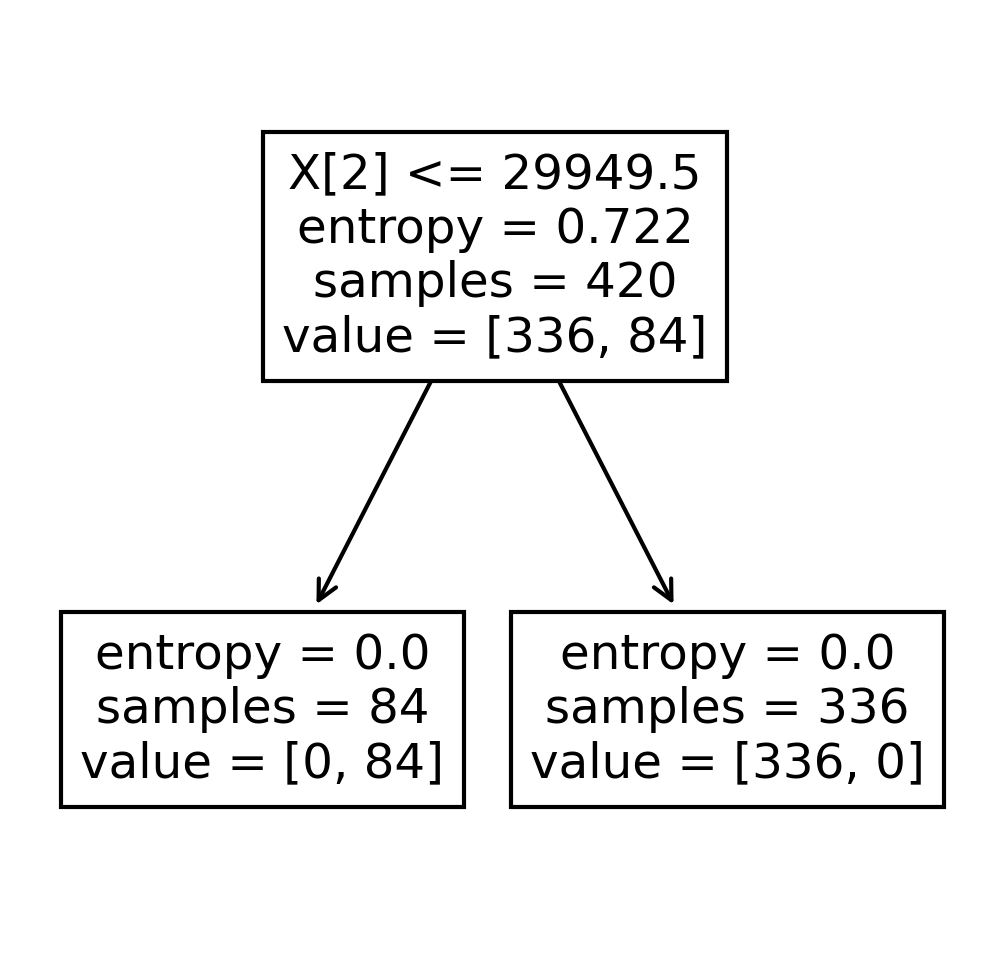

In [46]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
#PLot the decision tree
tree.plot_tree(model_entropy);

In [47]:
colnames = list(fraud_data.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Risk']

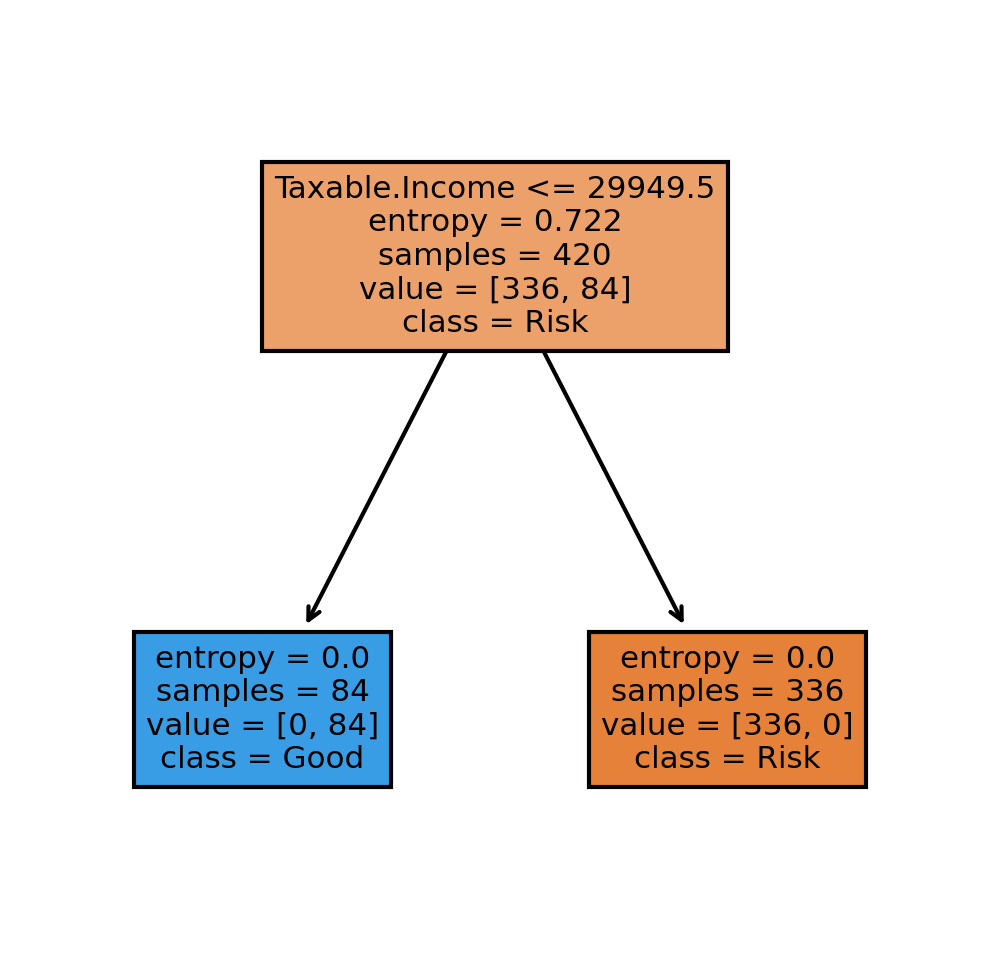

In [49]:
fn=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn=['Risk','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_entropy,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [50]:
#Predicting on test data
preds = model_entropy.predict(x_test_ent) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    140
1     40
dtype: int64

In [51]:
preds

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [52]:
pd.crosstab(y_test_ent,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Risk,,
0,140,0
1,0,40


In [53]:
# Accuracy 
np.mean(preds==y_test_ent)

1.0

In [54]:
pd#Predicting on test data
preds = model_entropy.predict(x_test_ent) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    140
1     40
dtype: int64

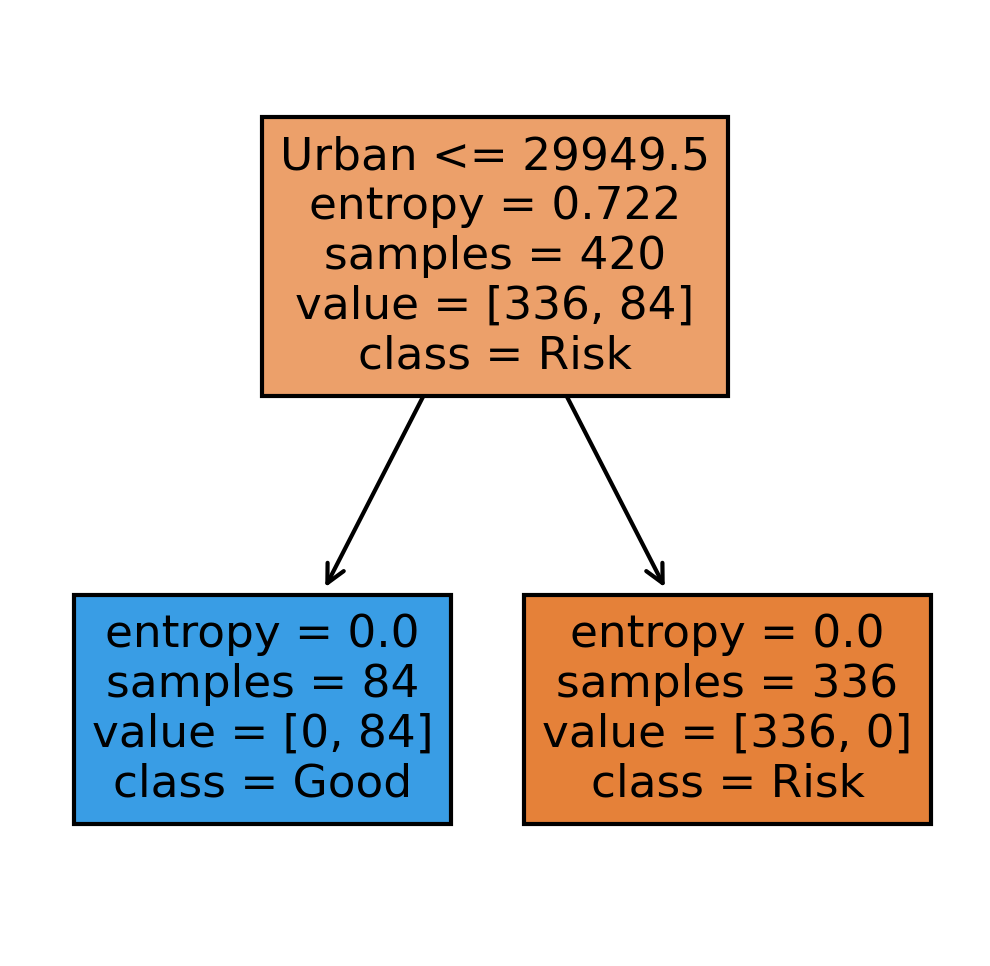

In [56]:
fn=['Taxable.Income','Work.Experience','Urban']
cn=['Risk','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_entropy,
               feature_names = fn, 
               class_names=cn,
               filled = True);

### Building Decision Tree Classifier (CART) using Gini Criteria

In [57]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [58]:
model_gini.fit(x_train_ent, y_train_ent)

DecisionTreeClassifier(max_depth=3)

In [59]:
#Prediction and computing the accuracy
preds=model_gini.predict(x_test_ent)
np.mean(preds==y_test_ent)

1.0

#### Decision Tree Regression Example

In [60]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [61]:
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risk
0,0,0,68833,50047,10,0,0
1,1,1,33700,134075,18,0,0
2,0,2,36925,160205,30,0,0
3,1,0,50190,193264,15,0,0
4,0,2,81002,27533,28,1,0


In [62]:
array = fraud_data.values
X_reg = array[:,0:6]
Y_reg = array[:,6]

In [63]:
#display data in X
X_reg

array([[     0,      0,  68833,  50047,     10,      0],
       [     1,      1,  33700, 134075,     18,      0],
       [     0,      2,  36925, 160205,     30,      0],
       ...,
       [     0,      1,  47334, 154058,      0,      0],
       [     1,      2,  98592, 180083,     17,      1],
       [     0,      1,  96519, 158137,     16,      1]], dtype=int64)

In [64]:
#Dsiaply data in Risk 
Y_reg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [65]:
X_train_reg, X_test_reg, Y_train_reg, Y_test_reg = train_test_split(X_reg, Y_reg, test_size=0.33, random_state=1)

In [66]:
print("X_train shape: ",X_train_reg.shape)
print("X_test shape",X_test_reg.shape)
print("Y_train.shape",Y_train_reg.shape)
print("Y_test.shape",Y_test_reg.shape)

X_train shape:  (402, 6)
X_test shape (198, 6)
Y_train.shape (402,)
Y_test.shape (198,)


In [68]:
model_regressor = DecisionTreeRegressor()
model_regressor.fit(X_train_reg, Y_train_reg)

DecisionTreeRegressor()

In [69]:
model_regressor.score(X_train_reg, Y_train_reg)

1.0

In [70]:
#Find the accuracy
model_regressor.score(X_test_reg,Y_test_reg)

1.0

## Feature Importance

In [71]:
# define a function for plotting the feature importances
def plot_feature_importances(model):
    feature_importances = pd.Series(model.feature_importances_, index=model.feature_names_in_)
    feature_importances = feature_importances.sort_values(axis=0, ascending=False)
    fig, ax = plt.subplots()
    feature_importances.plot.bar()
    ax.set_title("Feature importances")
    fig.tight_layout()

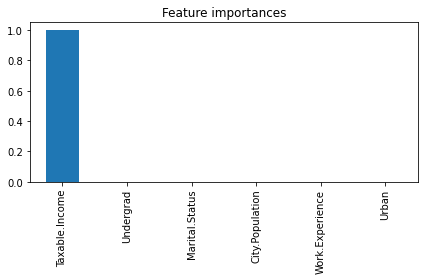

In [72]:
plot_feature_importances(model_entropy)

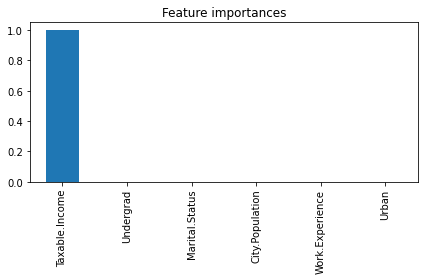

In [73]:
plot_feature_importances(model_gini)

### Taxable Incomce is the feature impacting if a person will default or not , no other features has any other role.